# Defensive Analysis: Catcher

This workbook aims at showing how a catcher's defense impacts his teams results and pitching staff. The defensive WAR metric was created by using various runs above average metrics for each catcher skill (receiving, throwing, fielding, and blocking) and assigning linear weights depending on the frequency of each action, along with the amount each action impacts the game (how responsible each one is for an out). I used scipy to create a linear regression model to study the effects of defensive WAR on various result-based statistics. 

I studied this because, as a long time catcher, I've always felt that credit has never been fairly attributed to catchers and their relative importance has been neglected. Despite some catchers' receiving upwards of 10,000 pitches in a game, their impact on a game hasn't been properly identified, which was the inspiration to create a defensive WAR metric aimed at correctly valuing a catcher defensively. 

I admit that there are many external factors that are difficult to account for, including umpire preference. The strike zone, while mostly uniform, can be different for every umpire. Also, a catcher's pitching staff has a large impact. A pitching staff that throws more accurately, or in other words "hits his spots" more frequently, it can be easier for the catcher to get more strikes that may be balls, compared to a pitching staff that consistently misses the desired location.

While most of the trends have very high variance in the data (highest R-Squared is 14.44%), the clusters of data tell the same story as many of my conclusions abotu each plot. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats

In [2]:
catcherData = pd.read_csv("CatcherData.csv")
teamData = pd.read_csv("Teams.csv")

In [3]:
mergedData = pd.merge(catcherData, teamData, on = ['Team', 'Year'], how = 'inner')

y=0.038982802267766195x+-2.9862794081979143
r_value=0.3071095483435453
r-squared: 9.43%


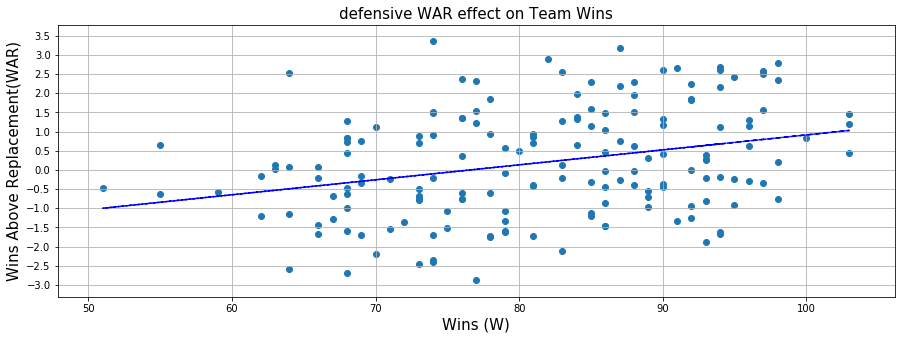

In [22]:
X = mergedData['W']
Y = mergedData['w.dWAR']

plt.figure(figsize=(15,5))
plt.yticks(np.arange(-5, 5, 0.5))
plt.xticks(np.arange(0, 150, 10))
plt.xlabel('Wins (W)', size=15)
plt.ylabel('Wins Above Replacement(WAR)', size=15)
plt.title('defensive WAR effect on Team Wins', size=15)

slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.scatter(X, Y)
plt.plot(X, fit, 'b--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(f"r_value={r_value}")
print("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

We see a very slight positive correlation (slope=0.039), but the data has a high variance (R-Squared = 9.43%). This will be a common theme amongst the plots, as it is difficult to isolate true impact with baseball data. There are so many external factors that a single players' impact will rarely decide a game. With that said, the positive correlation shows there is some impact that a catcher makes defensively on his team's results.

y=0.33317823676747704x+-25.61294800276125
r_value=0.29162480172891614
r-squared: 8.50%


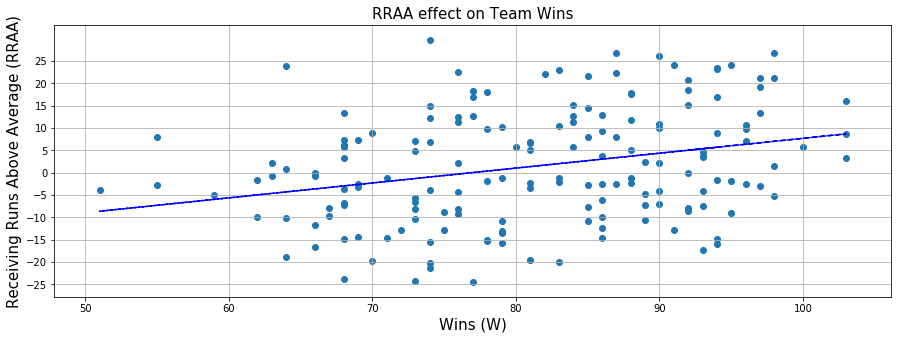

In [21]:
X = mergedData['W']
Y = mergedData['RRAA']

plt.figure(figsize=(15,5))
plt.yticks(np.arange(-30, 30, 5))
plt.xticks(np.arange(0, 150, 10))
plt.xlabel('Wins (W)', size=15)
plt.ylabel('Receiving Runs Above Average (RRAA)', size=15)
plt.title('RRAA effect on Team Wins', size=15)

slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.scatter(X, Y)
plt.plot(X, fit, 'b--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(f"r_value={r_value}")
print("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

y=-1.155420324113355x+4.721077395746502
r_value=-0.37997019745050564
r-squared: 14.44%


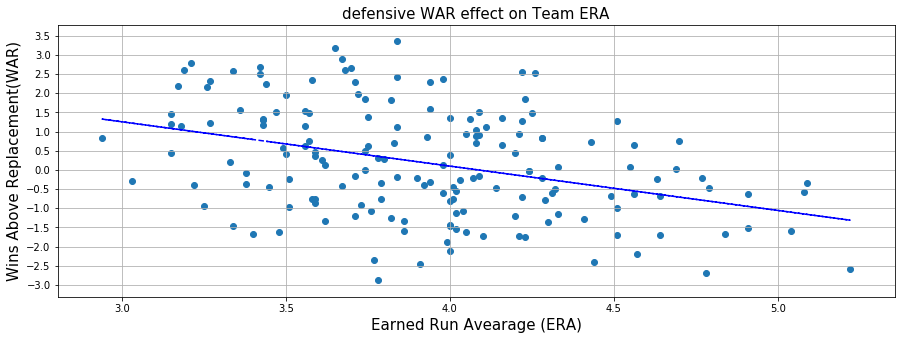

In [20]:
X = mergedData['ERA']
Y = mergedData['w.dWAR']

plt.figure(figsize=(15,5))
plt.yticks(np.arange(-5, 5, 0.5))
plt.xticks(np.arange(0, 6, 0.5))
plt.xlabel('Earned Run Avearage (ERA)', size=15)
plt.ylabel('Wins Above Replacement(WAR)', size=15)
plt.title('defensive WAR effect on Team ERA', size=15)

slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.scatter(X, Y)
plt.plot(X, fit, 'b--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(f"r_value={r_value}")
print("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

We see more of an impact on team ERA than on Wins from a catcher's defense (slope = -1.15). This makes sense becasue a catcher's defense should have more influence on how his pitching staff performs than it should to everyone else. The R-Squared value is still low (14.44%) but is the highest out of any of the plots. This negative correlation is exactly what we'd expect; the better the catcher the better the pitching staff performs. Also, as I illuded to before, the ability of a pitching staff also impacts how well the catcher will perform defensively.

y=0.0050747494546366225x+-6.179525350901417
r_value=0.36299525130003163
r-squared: 13.18%


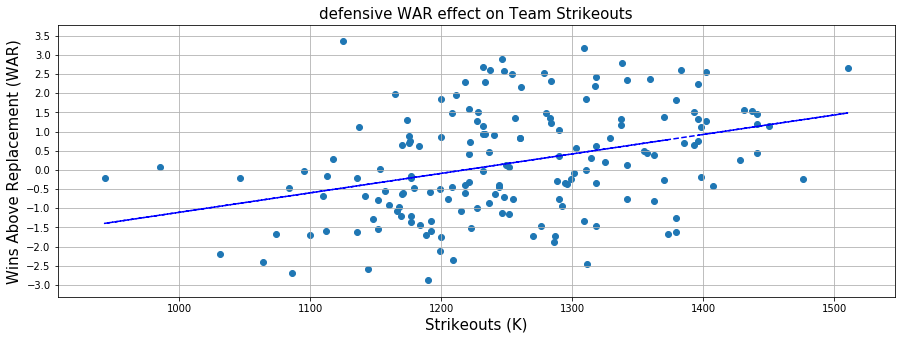

In [23]:
X = mergedData['SOA']
Y = mergedData['w.dWAR']

plt.figure(figsize=(15,5))
plt.yticks(np.arange(-5, 5, 0.5))
plt.xticks(np.arange(0, 2000, 100))
plt.xlabel('Strikeouts (K)', size=15)
plt.ylabel('Wins Above Replacement (WAR)', size=15)
plt.title('defensive WAR effect on Team Strikeouts', size=15)

slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.scatter(X, Y)
plt.plot(X, fit, 'b--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(f"r_value={r_value}")
print("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

We see a strong positive correlation between defensive WAR and team strikeouts. This makes sense, because of how impactful the WAR metric is, since the highest weight applied was to Receiving Runs Above Average (RRAA). Let's take a look at how RRAA impacts strikeouts as well:

y=0.04611233796015533x+-56.33848710240808
r_value=0.3664637715603519
r-squared: 13.43%


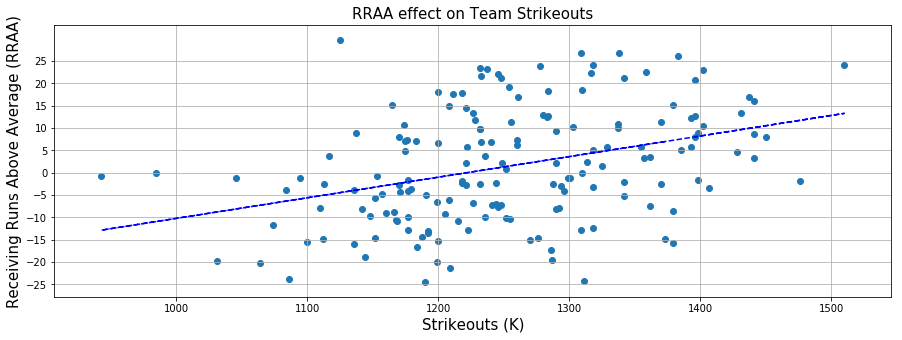

In [24]:
X = mergedData['SOA']
Y = mergedData['RRAA']

plt.figure(figsize=(15,5))
plt.yticks(np.arange(-30, 30, 5))
plt.xticks(np.arange(0, 2000, 100))
plt.xlabel('Strikeouts (K)', size=15)
plt.ylabel('Receiving Runs Above Average (RRAA)', size=15)
plt.title('RRAA effect on Team Strikeouts', size=15)

slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.scatter(X, Y)
plt.plot(X, fit, 'b--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(f"r_value={r_value}")
print("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

Here we see a slightly smaller variance in the data, showing that RRAA has a higher impact on a team's strikeout total than defensive WAR. This makes sense, because a catcher's ability to receive is calculated by their ability to get as many pitches called strikes as possible. While this is a large portion of defensive WAR, there are other factors that comprise of a cathcer's dWAR. 

y=-0.008616473096291124x+4.356069577395054
r_value=-0.3008270716441622
r-squared: 9.05%


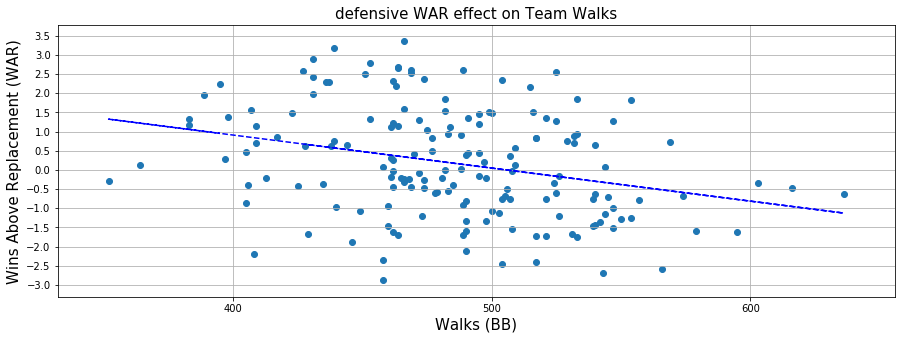

In [25]:
X = mergedData['BBA']
Y = mergedData['w.dWAR']

plt.figure(figsize=(15,5))
plt.yticks(np.arange(-5, 5, 0.5))
plt.xticks(np.arange(0, 1500, 100))
plt.xlabel('Walks (BB)', size=15)
plt.ylabel('Wins Above Replacement (WAR)', size=15)
plt.title('defensive WAR effect on Team Walks', size=15)

slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.scatter(X, Y)
plt.plot(X, fit, 'b--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(f"r_value={r_value}")
print("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

This plot shows how defensive WAR impacts the number of walks a team's pitching staff gives up. We do see a negative relationship as we'd expect, but its not very robust. 

y=-0.005642147314352613x+8.046355627619691
r_value=-0.3422139650109177
r-squared: 11.71%


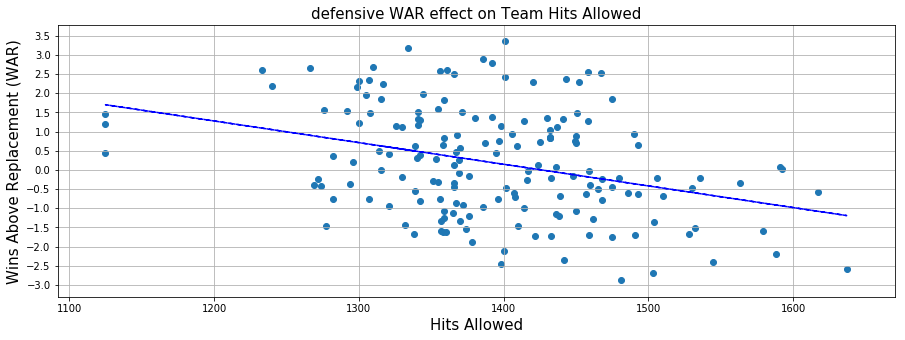

In [26]:
X = mergedData['HA']
Y = mergedData['w.dWAR']

plt.figure(figsize=(15,5))
plt.yticks(np.arange(-5, 5, 0.5))
plt.xticks(np.arange(1000, 2000, 100))
plt.xlabel('Hits Allowed', size=15)
plt.ylabel('Wins Above Replacement (WAR)', size=15)
plt.title('defensive WAR effect on Team Hits Allowed', size=15)

slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.scatter(X, Y)
plt.plot(X, fit, 'b--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(f"r_value={r_value}")
print("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

Similar trend as above, but here we're looking at number of hits. The data is a little more compact, but still the trend line doesn't represent the data very well. However, we still see the expected trend, as slight as it may be.

y=-0.009144506991962741x+1.6561207357513066
-0.165701475645
r-squared: 2.75%


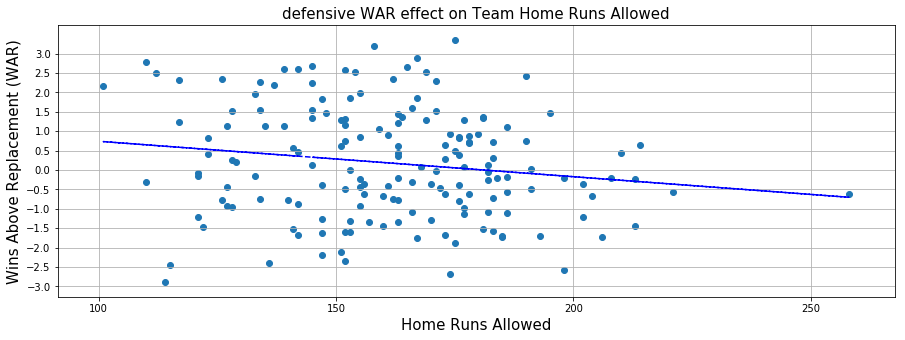

In [11]:
X = mergedData['HRA']
Y = mergedData['w.dWAR']

plt.figure(figsize=(15,5))
plt.yticks(np.arange(-3.5, 3.5, 0.5))
plt.xticks(np.arange(100, 500, 50))
plt.xlabel('Home Runs Allowed', size=15)
plt.ylabel('Wins Above Replacement (WAR)', size=15)
plt.title('defensive WAR effect on Team Home Runs Allowed', size=15)

slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.scatter(X, Y)
plt.plot(X, fit, 'b--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(r_value)
print("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

No trend here between home runs and dWAR. Very low r-squared value and slope, showing there isn't a trend between the variables.